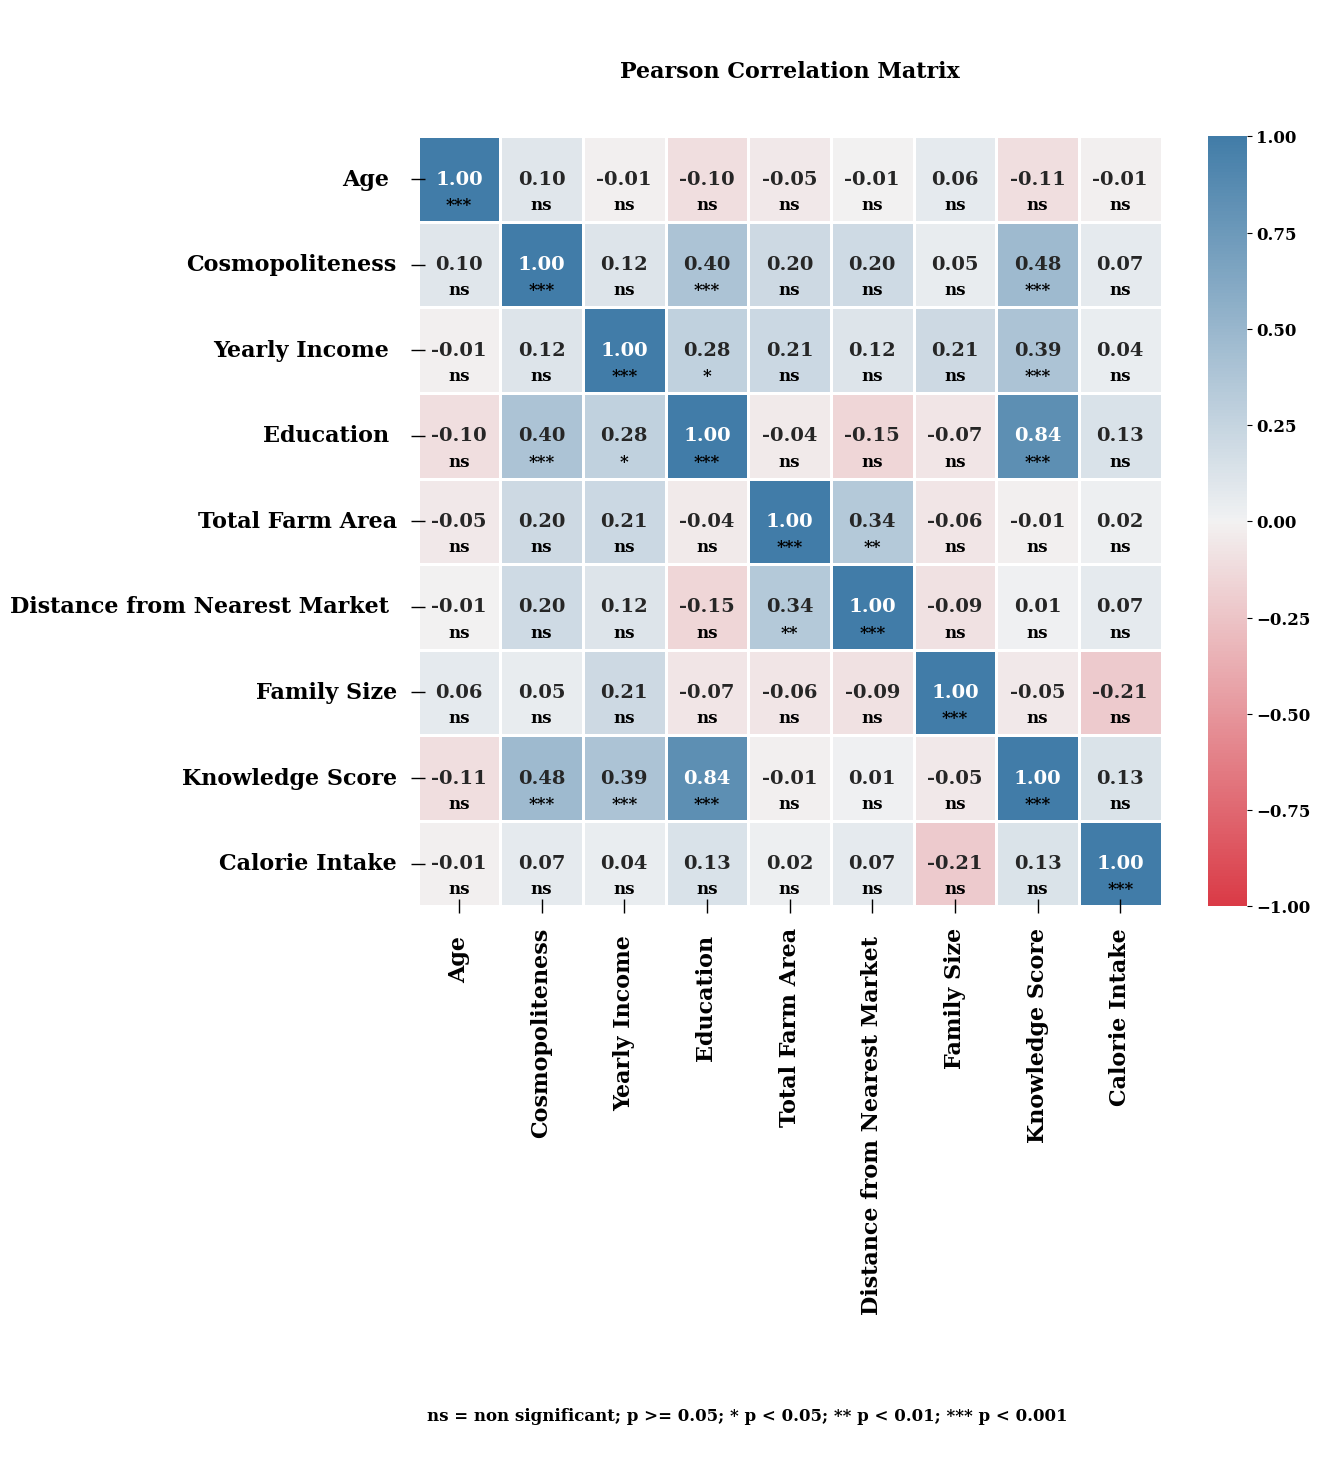

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
import matplotlib
import matplotlib.font_manager

# Set all fonts to bold
matplotlib.rcParams['font.weight'] = 'bold'

# Read data from an Excel file
df = pd.read_excel('Alif.xlsx')
# Calculate Pearson correlation matrix and p-values
correlation_matrix = df.corr()
p_values = correlation_matrix.apply(lambda x: correlation_matrix.apply(lambda y: pearsonr(df[x.name], df[y.name])[1]))

# Add Times new roman font
matplotlib.rc('font', family='Times New Roman')
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Times New Roman'] + matplotlib.rcParams['font.serif']

# Plot the heatmap with custom colormap
plt.figure(figsize=(12,10 ))

# Create a custom colormap (positive values in blue, negative values in red)
cmap = sns.diverging_palette(10, 240, as_cmap=True)
mask = np.zeros_like(correlation_matrix)
# heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, mask=mask, vmin=-1, vmax=1, annot_kws={"size": 14, "weight": "bold"})
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, mask=mask, vmin=-1, vmax=1, annot_kws={"size": 14, "weight": "bold"}, edgecolor='black', linewidth=2)
# Annotate the heatmap with significance stars
for i in range(len(p_values.columns)):
    for j in range(len(p_values.index)):
        p = p_values.iloc[j, i]
        if p < 0.001:
            heatmap.text(i + 0.5, j + 0.8, '***', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
        elif p < 0.01:
            heatmap.text(i + 0.5, j + 0.8, '**', ha='center', va='center', color='black',fontsize=12, fontweight='bold')
        elif p < 0.05:
            heatmap.text(i + 0.5, j + 0.8, '*', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
        else:
            heatmap.text(i + 0.5, j + 0.8, 'ns', ha='center', va='center', color='black', fontsize=12,fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=16,  labelcolor='black', pad=10, length=10, width=1, direction='inout', bottom=True, left=True, labelbottom=True, labeltop=False, labelleft=True, labelright=False)

# Get the colorbar from the heatmap
cbar = heatmap.collections[0].colorbar
# Set the colorbar label size
cbar.ax.tick_params(labelsize=12)

plt.title('\n\nPearson Correlation Matrix\n\n', fontsize=16 , fontweight='bold')
plt.figtext(0.40, -0.4, '\n\nns = non significant; p >= 0.05; * p < 0.05; ** p < 0.01; *** p < 0.001\n\n', ha='center', va='center', color='black', fontsize=12)

plt.xticks()
plt.yticks()
plt.show()